# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/hardikprakash/Projects/powerq/data/raw/powerconsumption.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


# Extract Time Features

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,year,month,day,hour,day_of_week,is_weekend
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017,1,1,0,6,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017,1,1,0,6,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017,1,1,0,6,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017,1,1,0,6,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017,1,1,0,6,1


## Check for missing values

In [4]:
print(df.isnull().sum())

df['Temperature'].fillna(method='ffill', inplace=True)
df['Humidity'].fillna(method='ffill', inplace=True)
df['WindSpeed'].fillna(method='ffill', inplace=True)


Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
year                      0
month                     0
day                       0
hour                      0
day_of_week               0
is_weekend                0
dtype: int64


/tmp/ipykernel_9642/3163888873.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9642/3163888873.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temperature'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9642/3163888873.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.


# Check for outliers

In [5]:
# Cap outliers in WindSpeed (example)
wind_speed_limit = df['WindSpeed'].quantile(0.99)
df['WindSpeed'] = np.where(df['WindSpeed'] > wind_speed_limit, wind_speed_limit, df['WindSpeed'])


# Lagged Features

In [6]:
# Create lagged power consumption features
df['Zone1_Lag1'] = df['PowerConsumption_Zone1'].shift(1)
df['Zone2_Lag1'] = df['PowerConsumption_Zone2'].shift(1)
df['Zone3_Lag1'] = df['PowerConsumption_Zone3'].shift(1)


# Rolling Features

In [7]:
# Create 1-hour rolling mean for power consumption
df['Zone1_RollingMean_1H'] = df['PowerConsumption_Zone1'].rolling(window=6).mean()

# Normalisation

In [8]:
from sklearn.preprocessing import StandardScaler

# Example: Standardize selected columns
scaler = StandardScaler()
df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 
    'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 
    'PowerConsumption_Zone3']] = scaler.fit_transform(df[['Temperature', 
                                                          'Humidity', 
                                                          'WindSpeed', 
                                                          'GeneralDiffuseFlows', 
                                                          'DiffuseFlows', 
                                                          'PowerConsumption_Zone1', 
                                                          'PowerConsumption_Zone2', 
                                                          'PowerConsumption_Zone3']])


# Train/Test Split

In [9]:
# Example: Split the data into training and testing sets based on time
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


# Correlation

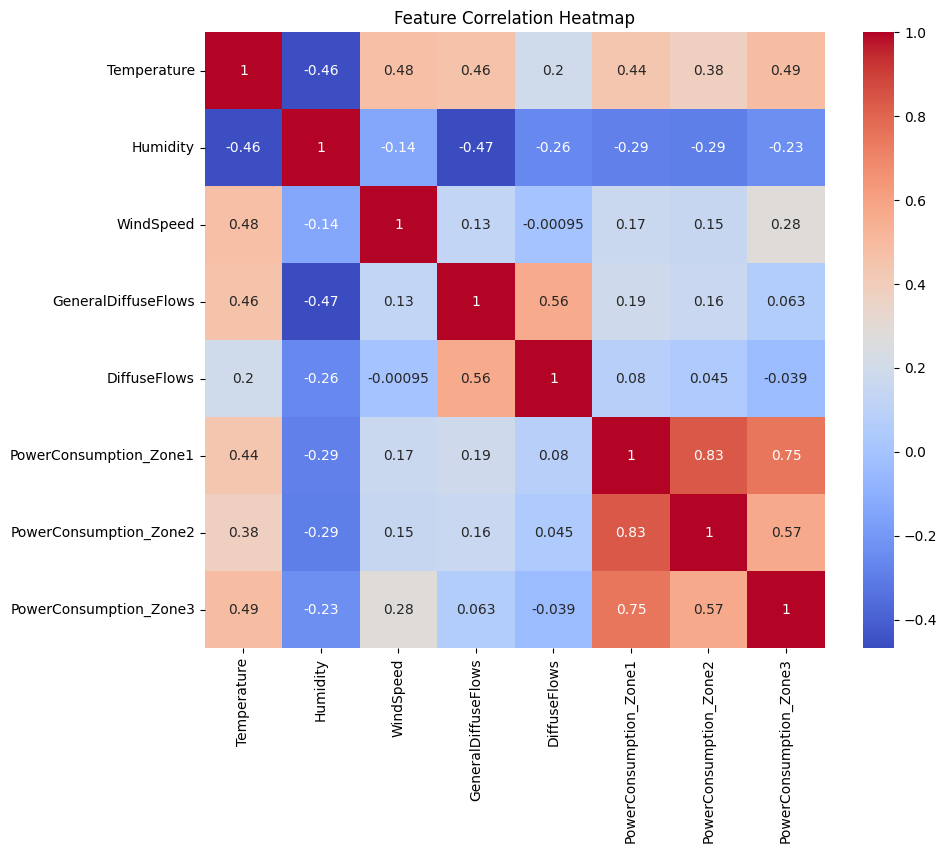

In [10]:
correlation = df[['Temperature', 'Humidity', 'WindSpeed', 
                  'GeneralDiffuseFlows', 'DiffuseFlows', 
                  'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 
                  'PowerConsumption_Zone3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
